In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_csv('./data/CreditCard Clustering Task - Data.csv', index_col="CUST_ID")
df.head()
df.shape

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


(8950, 17)

Ref

**K-mean**

https://www.kaggle.com/karthickaravindan/k-means-clustering-project

https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail

https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation

In [3]:
df = df.dropna()

In [4]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [5]:
X = df.iloc[:, :17].values
X.shape

(8636, 17)

In [6]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X

array([[-4391.44749013,   911.24746854],
       [ 4044.63421079, -2565.16017688],
       [ 1418.39484497, -1924.557181  ],
       ...,
       [-4444.59307006,   905.46748511],
       [-4855.4229431 ,  1016.38462302],
       [-3685.0908069 ,  1559.63540317]])

<function matplotlib.pyplot.show(*args, **kw)>

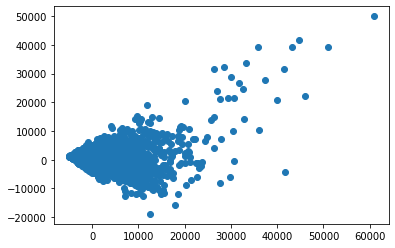

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.show

In [50]:
def centroidPoint(X_pca, k, random_seed):
  np.random.seed(random_seed)
  ct = X.copy()
  np.random.shuffle(X)
  return ct[:k]

In [51]:
centroidPoint(X, 3, random_seed=100)

array([[-4391.44749013,   911.24746854],
       [ 4044.63421079, -2565.16017688],
       [ 1418.39484497, -1924.557181  ]])

In [52]:
def euclidien(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2, axis=1))

In [53]:
def ssError(x, k , centroid, cluster):
  error = 0
  for i in range(k):
    # print(cluster == i, k)
    error += np.sum((centroid[i] - X[cluster==i])**2)
  return error

In [54]:
def kMean(X, k, nit=100, random_seed=100):
  cluster = np.zeros((X.shape[0]))
  distances = np.zeros((X.shape[0], k))
  errors = []
  centroid = centroidPoint(X, k, random_seed)
  for i in range(nit):
    error = ssError(X, k , centroid, cluster)
    errors.append(error)

    for j in range(k):
       distances[:, j] = euclidien(centroid[j], X)
    cluster = np.argmin(distances, axis=1)

    for j in range(k):
      centroid[j] = np.mean(X[cluster == j], axis=0)

  return cluster, centroid, errors

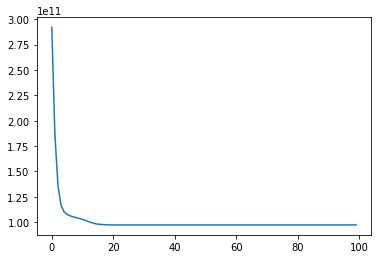

In [55]:
cluster, centroid, errors = kMean(X, 3 , 100, 100)
plt.plot(errors)
plt.show()

In [56]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

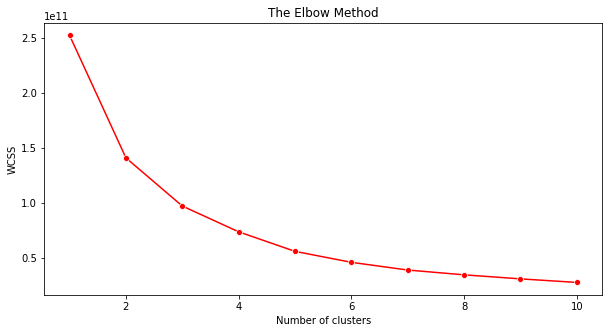

In [57]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

<Figure size 1080x504 with 0 Axes>

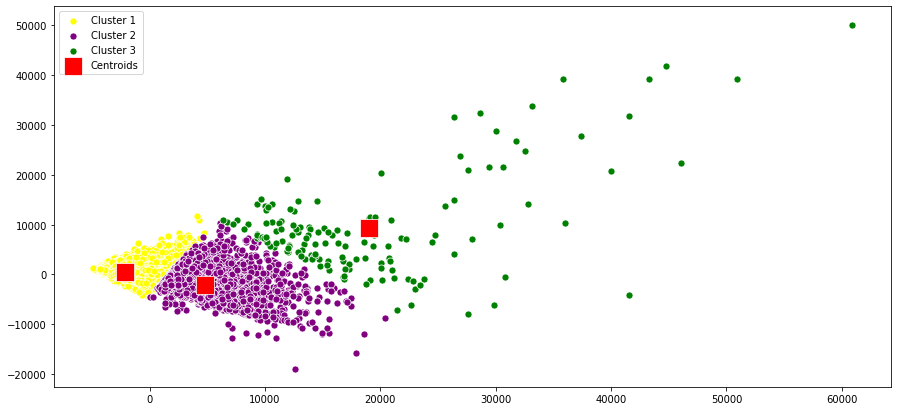

In [59]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'purple', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.show()